In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/house-price-dataset-of-india/House Price India.csv')
df.drop(['id','Date'], axis=1, inplace=True)
df.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,5,2.50,3650,9050,2.0,0,4,5,10,3370,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,4,2.50,2920,4000,1.5,0,0,5,8,1910,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,5,2.75,2910,9480,1.5,0,0,3,8,2910,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,4,2.50,3310,42998,2.0,0,0,3,9,3310,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,3,2.00,2710,4500,1.5,0,0,4,8,1880,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     14620 non-null  int64  
 1   number of bathrooms                    14620 non-null  float64
 2   living area                            14620 non-null  int64  
 3   lot area                               14620 non-null  int64  
 4   number of floors                       14620 non-null  float64
 5   waterfront present                     14620 non-null  int64  
 6   number of views                        14620 non-null  int64  
 7   condition of the house                 14620 non-null  int64  
 8   grade of the house                     14620 non-null  int64  
 9   Area of the house(excluding basement)  14620 non-null  int64  
 10  Area of the basement                   14620 non-null  int64  
 11  Bu

In [4]:
df.isna().sum()

number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int64

In [5]:
X = df.drop('Price', axis=1)
y = df['Price']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [8]:
print(f'\n shape of X_train - {X_train.shape}\n')
print(f' shape of X_test - {X_test.shape}\n')
print(f' shape of y_train - {y_train.shape}\n')
print(f' shape of y_test - {y_test.shape}\n')


 shape of X_train - (11696, 20)

 shape of X_test - (2924, 20)

 shape of y_train - (11696,)

 shape of y_test - (2924,)



In [10]:
number_of_features = len(X.columns)

model = Sequential()

model.add(layer=Input(shape=number_of_features))

model.add(layer=Dense(units=32, activation='relu'))

model.add(layer=Dense(units=64, activation='relu'))

model.add(layer=Dense(units=128, activation='relu'))

model.add(layer=Dense(units=256, activation='relu'))

model.add(layer=Dense(units=512, activation='relu'))

model.add(layer=Dense(units=1024, activation='relu'))

model.add(layer=Dense(units=2048, activation='relu'))

model.add(layer=Dense(units=256, activation='relu'))

model.add(layer=Dense(units=128, activation='relu'))

model.add(layer=Dense(units=64, activation='relu'))

model.add(layer=Dense(units=32, activation='relu'))

model.add(layer=Dense(units=16, activation='relu'))

model.add(layer=Dense(units=1, activation='linear'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                672       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 512)               131584    
                                                                 
 dense_5 (Dense)             (None, 1024)              525312    
                                                                 
 dense_6 (Dense)             (None, 2048)             

In [19]:
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])

In [20]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
366/366 [==============================] - 16s 36ms/step - loss: 128332414976.0000 - mae: 231897.7188 - mape: 51.2177
Epoch 2/100
366/366 [==============================] - 14s 37ms/step - loss: 72662933504.0000 - mae: 181487.0000 - mape: 38.0939
Epoch 3/100
366/366 [==============================] - 13s 36ms/step - loss: 64926949376.0000 - mae: 170624.8906 - mape: 35.2871
Epoch 4/100
366/366 [==============================] - 13s 35ms/step - loss: 60974129152.0000 - mae: 164643.6719 - mape: 34.2379
Epoch 5/100
366/366 [==============================] - 13s 35ms/step - loss: 71509073920.0000 - mae: 175660.6094 - mape: 36.7780
Epoch 6/100
366/366 [==============================] - 13s 35ms/step - loss: 59199778816.0000 - mae: 162958.2812 - mape: 33.9514
Epoch 7/100
366/366 [==============================] - 13s 36ms/step - loss: 60919717888.0000 - mae: 165689.7031 - mape: 34.7648
Epoch 8/100
366/366 [==============================] - 13s 34ms/step - loss: 58513846272.0000 - 

In [21]:
y_pred = model.predict(X_test)

92/92 [==============================] - 1s 6ms/step


In [22]:
y_pred

array([[341904.03],
       [388304.84],
       [288875.1 ],
       ...,
       [399390.1 ],
       [314774.38],
       [447950.78]], dtype=float32)

In [23]:
y_test

12149    640000
13581    650000
11595    325000
2769     373000
7393     355000
          ...  
7362     497000
11132    400000
142      366750
1405     276000
6184     569000
Name: Price, Length: 2924, dtype: int64

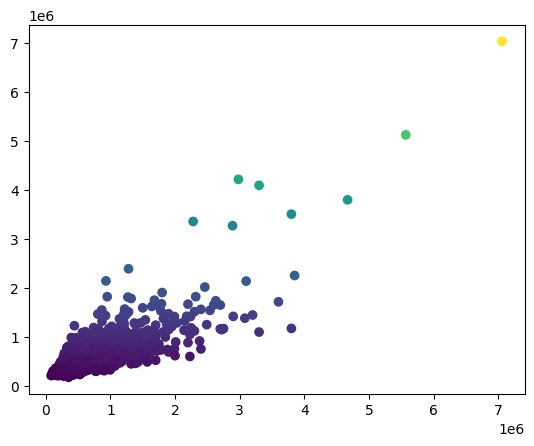

In [24]:
plt.scatter(y_test, y_pred, c=y_pred)
plt.show()

In [25]:
pd.DataFrame({'Actual Value':y_test.values.flatten(), 'Predicted Value':y_pred.flatten()})

,Actual Value,Predicted Value
0,640000,341904.03125
1,650000,388304.84375
2,325000,288875.09375
3,373000,441750.96875
4,355000,495982.46875
...,...,...
2919,497000,537130.75000
2920,400000,339434.59375
2921,366750,399390.09375
2922,276000,314774.37500


In [26]:
r2_score(y_pred=y_pred, y_true=y_test) * 100

64.68478878448707